## Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
import seaborn as sns
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import os
import random
import random as rn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set image_size and batch_size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Target Directory
directory = "/content/drive/MyDrive/Dataset/"

# Train Data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
             directory,
             subset='training',
             validation_split=0.2,
             image_size=IMAGE_SIZE,
             batch_size=BATCH_SIZE,
             seed=42)

# Valid data
valid_data = tf.keras.preprocessing.image_dataset_from_directory(
            directory,
            subset='validation',
            validation_split=0.2,
            image_size=IMAGE_SIZE,
            batch_size=BATCH_SIZE,
             seed=42)

Found 1433 files belonging to 25 classes.
Using 1147 files for training.
Found 1433 files belonging to 25 classes.
Using 286 files for validation.


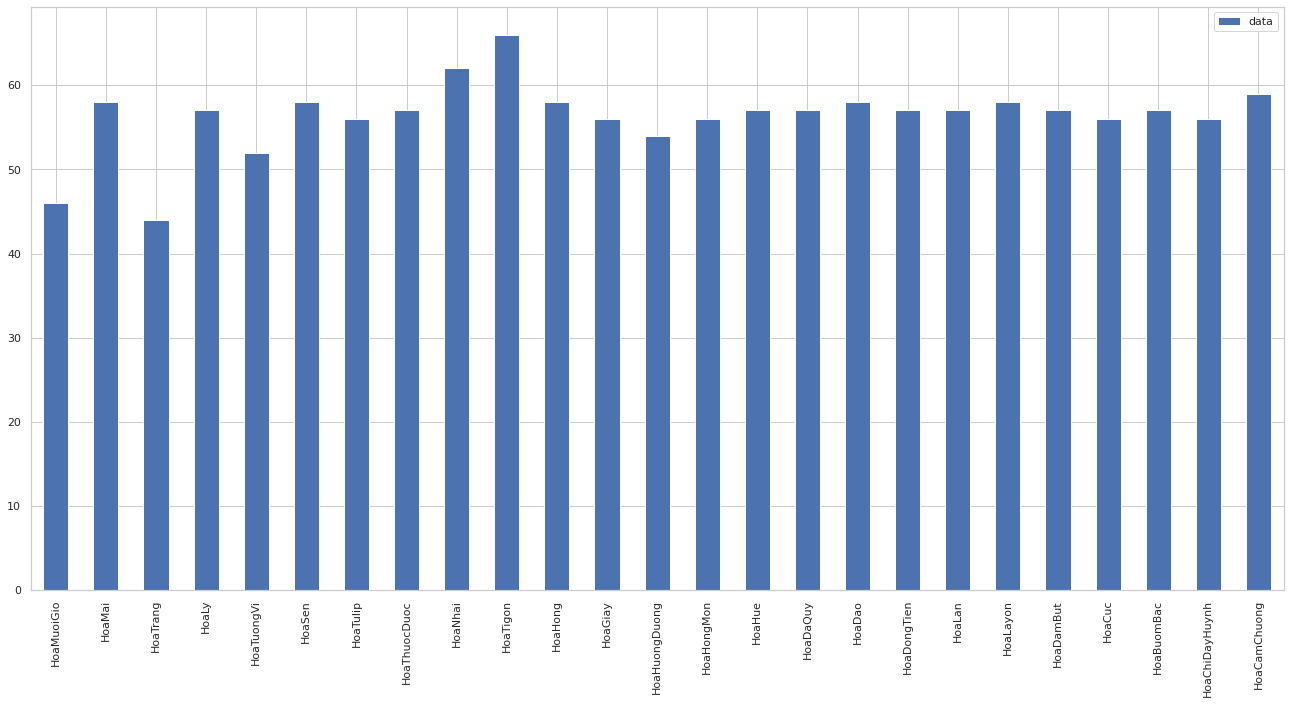

In [ ]:
#Dua du lieu ve dang bang
def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))-1
    df = pd.DataFrame(dict_, index=[set_])
    return df 
data_count = count_exp(directory, 'data')
#Bang
data_count.transpose().plot(kind='bar', figsize=(20,10))

In [ ]:
class_names = train_data.class_names
class_names

['HoaBuomBac',
 'HoaCamChuong',
 'HoaChiDayHuynh',
 'HoaCuc',
 'HoaDaQuy',
 'HoaDamBut',
 'HoaDao',
 'HoaDongTien',
 'HoaGiay',
 'HoaHong',
 'HoaHongMon',
 'HoaHue',
 'HoaHuongDuong',
 'HoaLan',
 'HoaLayon',
 'HoaLy',
 'HoaMai',
 'HoaMuoiGio',
 'HoaNhai',
 'HoaSen',
 'HoaThuocDuoc',
 'HoaTigon',
 'HoaTrang',
 'HoaTulip',
 'HoaTuongVi']

In [ ]:
label_encode = LabelEncoder()
class_names_label_encode = label_encode.fit_transform(class_names)
class_names_label_encode

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

## Hình dung hình ảnh

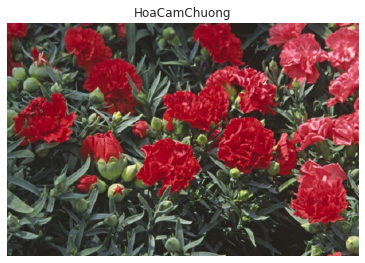

In [ ]:
img = plt.imread("/content/drive/MyDrive/Dataset/HoaCamChuong/HoaCamChuong10.jpg")
plt.imshow(img)
plt.title("HoaCamChuong")
plt.axis("off")
plt.show();

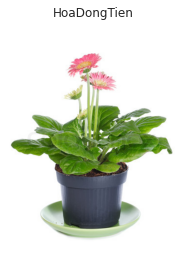

In [ ]:
img = plt.imread("/content/drive/MyDrive/Dataset/HoaDongTien/HoaDongTien (11).jpg")
plt.imshow(img)
plt.title("HoaDongTien")
plt.axis("off")
plt.show();

## Tạo chức năng Preprocess_image

Hàm trở về kiểu `float32` và chia tỷ lệ giữa 0 & 1 với image_shape = 224

muốn biết Image data preprocessing là cái gì thì [bấm dô đây](https://keras.io/api/preprocessing/image/)

In [ ]:
def preprocess_image(image, label, image_shape=224):
    
    img = tf.image.resize(image, [image_shape, image_shape])
    img = img/225.
    
    return tf.cast(img, tf.float32), label

In [ ]:
preprocess_image(image=img, label='HoaDongTien')

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[1.1333333, 1.1333333, 1.1333333],
         [1.1333333, 1.1333333, 1.1333333],
         [1.1333333, 1.1333333, 1.1333333],
         ...,
         [1.1333333, 1.1333333, 1.1333333],
         [1.1333333, 1.1333333, 1.1333333],
         [1.1333333, 1.1333333, 1.1333333]],
 
        [[1.1333333, 1.1333333, 1.1333333],
         [1.1333333, 1.1333333, 1.1333333],
         [1.1333333, 1.1333333, 1.1333333],
         ...,
         [1.1333333, 1.1333333, 1.1333333],
         [1.1333333, 1.1333333, 1.1333333],
         [1.1333333, 1.1333333, 1.1333333]],
 
        [[1.1333333, 1.1333333, 1.1333333],
         [1.1333333, 1.1333333, 1.1333333],
         [1.1333333, 1.1333333, 1.1333333],
         ...,
         [1.1333333, 1.1333333, 1.1333333],
         [1.1333333, 1.1333333, 1.1333333],
         [1.1333333, 1.1333333, 1.1333333]],
 
        ...,
 
        [[1.1333333, 1.1333333, 1.1333333],
         [1.1333333, 1.1333333, 1.1333333]

## Batch & Prefetch

In [ ]:
# prerocess_image thành train_data
train_data = train_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
# ran the data
train_data = train_data.shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)


# preprocess_image to valid_data
valid_data = valid_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
# shuffle the data
valid_data = valid_data.shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
train_data, valid_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

## Modelling

#### Simple Dense Model

In [ ]:
def plot_loss_curves(history):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

  # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

  # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

### Model_2

In [ ]:
# Set random seed
tf.random.set_seed(42)

# model_2
model_2 = Sequential([
    Conv2D(filters=32, kernel_size=4, padding='same', activation='relu', input_shape=(224,224,3)),
    MaxPool2D(2,2),
    Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'),
    MaxPool2D(2,2),
    Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'),
    MaxPool2D(2,2),
    Conv2D(filters=128, kernel_size=5, padding='same', activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(len(class_names_label_encode), activation='softmax')
])

# Compile
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer='adam',
               metrics=['accuracy'])

# Fit 
history_2 = model_2.fit(train_data,
                       epochs=10,
                       validation_data=valid_data)

Epoch 1/10
36/36 [==============================] - 476s 3s/step - loss: 3.2274 - accuracy: 0.0418 - val_loss: 3.2193 - val_accuracy: 0.0245
Epoch 2/10
36/36 [==============================] - 12s 125ms/step - loss: 3.2182 - accuracy: 0.0418 - val_loss: 3.2152 - val_accuracy: 0.0490
Epoch 3/10
36/36 [==============================] - 12s 126ms/step - loss: 3.1372 - accuracy: 0.0680 - val_loss: 3.0926 - val_accuracy: 0.1049
Epoch 4/10
36/36 [==============================] - 12s 125ms/step - loss: 2.9722 - accuracy: 0.1151 - val_loss: 2.9287 - val_accuracy: 0.1364
Epoch 5/10
36/36 [==============================] - 12s 126ms/step - loss: 2.5897 - accuracy: 0.2171 - val_loss: 2.5941 - val_accuracy: 0.2168
Epoch 6/10
36/36 [==============================] - 12s 125ms/step - loss: 2.2679 - accuracy: 0.3025 - val_loss: 2.4898 - val_accuracy: 0.2867
Epoch 7/10
36/36 [==============================] - 12s 125ms/step - loss: 1.8870 - accuracy: 0.4237 - val_loss: 2.5174 - val_accuracy: 0.2762
E

In [ ]:
#model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        65600     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

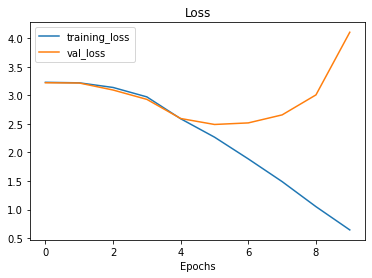

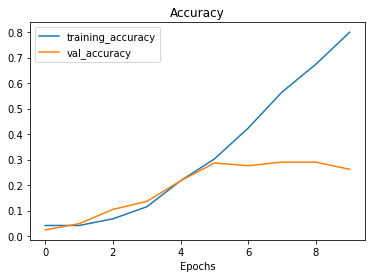

In [ ]:
# plot 
plot_loss_curves(history_2)

## Model_3

In [ ]:
# random seed
tf.random.set_seed(42)

# model_3
model_3 = Sequential([
    Conv2D(filters=32, kernel_size=4, padding='same', activation='relu', input_shape=(224,224,3)),
    MaxPool2D(2,2),
    Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'),
    MaxPool2D(2,2),
    Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'),
    MaxPool2D(2,2),
    Conv2D(filters=128, kernel_size=5, padding='same', activation='relu'),
    MaxPool2D(3,3),
    Conv2D(filters=128, kernel_size=5, padding='same', activation='relu'),
    MaxPool2D(3,3),
    Conv2D(filters=128,kernel_size=5, padding='same', activation='relu'),
    MaxPool2D(3,3),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(len(class_names_label_encode), activation='softmax')
    
])

# compile
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# fit 
history_3 = model_3.fit(train_data,
                       epochs=20,
                       validation_data=valid_data)

Epoch 1/20
36/36 [==============================] - 13s 134ms/step - loss: 3.2215 - accuracy: 0.0331 - val_loss: 3.2095 - val_accuracy: 0.0315
Epoch 2/20
36/36 [==============================] - 13s 128ms/step - loss: 3.1417 - accuracy: 0.0654 - val_loss: 3.1392 - val_accuracy: 0.0664
Epoch 3/20
36/36 [==============================] - 12s 127ms/step - loss: 3.0897 - accuracy: 0.0811 - val_loss: 3.1195 - val_accuracy: 0.0594
Epoch 4/20
36/36 [==============================] - 12s 126ms/step - loss: 3.0324 - accuracy: 0.0959 - val_loss: 3.0682 - val_accuracy: 0.0699
Epoch 5/20
36/36 [==============================] - 12s 128ms/step - loss: 2.9751 - accuracy: 0.0863 - val_loss: 2.9854 - val_accuracy: 0.0734
Epoch 6/20
36/36 [==============================] - 12s 128ms/step - loss: 2.8552 - accuracy: 0.1064 - val_loss: 2.8711 - val_accuracy: 0.1014
Epoch 7/20
36/36 [==============================] - 12s 127ms/step - loss: 2.7659 - accuracy: 0.1316 - val_loss: 2.8907 - val_accuracy: 0.1119

In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      1568      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      32832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 64)        65600     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 64)      

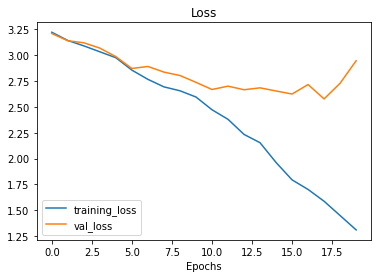

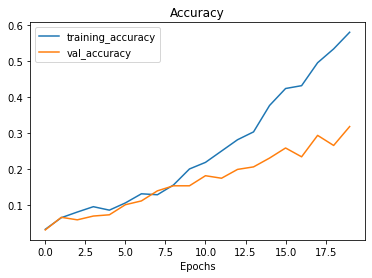

In [ ]:
plot_loss_curves(history_3)

## Transfer Learning

### Inception V3

In [ ]:
# Download Inception V3 model
base_model_inception = tf.keras.applications.inception_v3.InceptionV3(include_top=False)

base_model_inception.trainable=False

# Inputs
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

# chia gia tri
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

# chuyen dau vao base_model
x = base_model_inception(inputs,training=False)

# GlobalAveragePooling2D
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# outputs
outputs = tf.keras.layers.Dense(len(class_names_label_encode), activation='softmax')(x)

# Build model
model_4 = tf.keras.Model(inputs, outputs)

# Compile 
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer='adam',
               metrics=['accuracy'])


87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
model_4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_4 (Dense)             (None, 25)                51225     
                                                                 
Total params: 21,854,009
Trainable params: 51,225
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:

history_4 = model_4.fit(train_data,
                       epochs=10,
                       validation_data=valid_data)

Epoch 1/10
36/36 [==============================] - 21s 238ms/step - loss: 2.6802 - accuracy: 0.2485 - val_loss: 2.1124 - val_accuracy: 0.4126
Epoch 2/10
36/36 [==============================] - 13s 146ms/step - loss: 1.5602 - accuracy: 0.5824 - val_loss: 1.7273 - val_accuracy: 0.5035
Epoch 3/10
36/36 [==============================] - 13s 145ms/step - loss: 1.1294 - accuracy: 0.7088 - val_loss: 1.5963 - val_accuracy: 0.5350
Epoch 4/10
36/36 [==============================] - 13s 146ms/step - loss: 0.9190 - accuracy: 0.7690 - val_loss: 1.4461 - val_accuracy: 0.5280
Epoch 5/10
36/36 [==============================] - 13s 145ms/step - loss: 0.7362 - accuracy: 0.8335 - val_loss: 1.3685 - val_accuracy: 0.5664
Epoch 6/10
36/36 [==============================] - 13s 146ms/step - loss: 0.6123 - accuracy: 0.8631 - val_loss: 1.3352 - val_accuracy: 0.5699
Epoch 7/10
36/36 [==============================] - 13s 145ms/step - loss: 0.5213 - accuracy: 0.8928 - val_loss: 1.2651 - val_accuracy: 0.5874

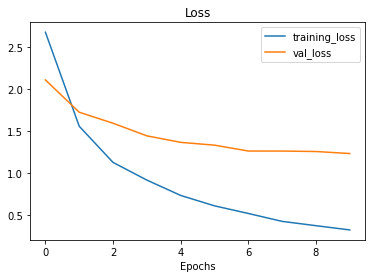

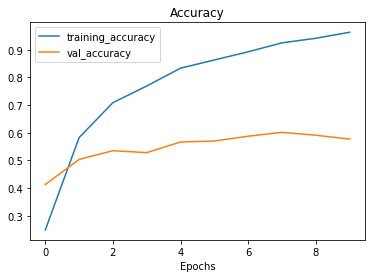

In [ ]:
plot_loss_curves(history_4)

### Resnet50

In [ ]:

baseline_model_resnet50 = tf.keras.applications.resnet50.ResNet50(include_top=False)


baseline_model_resnet50.trainable= False


inputs = tf.keras.layers.Input(shape=(224,224,3))


x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)


x = baseline_model_resnet50(inputs,training=False)


x = tf.keras.layers.GlobalAveragePooling2D()(x)


outputs = tf.keras.layers.Dense(len(class_names_label_encode),activation='softmax')(x)


model_5 = tf.keras.Model(inputs,outputs)

# Compile
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer='adam',
               metrics=['accuracy'])

# Summary
model_5.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 25)                51225     
                                                                 
Total params: 23,638,937
Trainable params: 51,225
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                       epochs=20,
                       validation_data=valid_data)

Epoch 1/20
36/36 [==============================] - 20s 230ms/step - loss: 3.3552 - accuracy: 0.0462 - val_loss: 3.2238 - val_accuracy: 0.0559
Epoch 2/20
36/36 [==============================] - 14s 171ms/step - loss: 3.1673 - accuracy: 0.0636 - val_loss: 3.1602 - val_accuracy: 0.0699
Epoch 3/20
36/36 [==============================] - 14s 171ms/step - loss: 3.1110 - accuracy: 0.0741 - val_loss: 3.1609 - val_accuracy: 0.0734
Epoch 4/20
36/36 [==============================] - 14s 171ms/step - loss: 3.0776 - accuracy: 0.0872 - val_loss: 3.1387 - val_accuracy: 0.0734
Epoch 5/20
36/36 [==============================] - 14s 171ms/step - loss: 3.0507 - accuracy: 0.0846 - val_loss: 3.1295 - val_accuracy: 0.0769
Epoch 6/20
36/36 [==============================] - 14s 172ms/step - loss: 3.0204 - accuracy: 0.1072 - val_loss: 3.0705 - val_accuracy: 0.1049
Epoch 7/20
36/36 [==============================] - 14s 173ms/step - loss: 3.0100 - accuracy: 0.1160 - val_loss: 3.0488 - val_accuracy: 0.1154

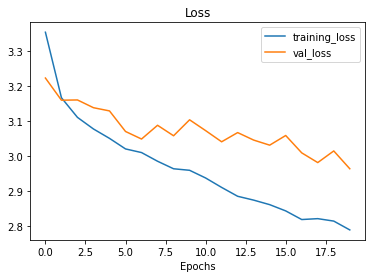

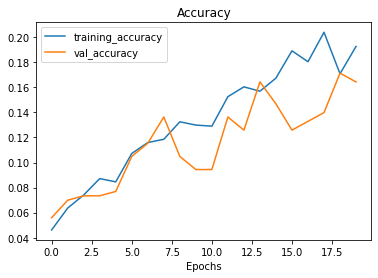

In [ ]:
# plotlossscurve
plot_loss_curves(history_5)

## EfficientnetB5

In [ ]:

baseline_model_efficientnetb5 = tf.keras.applications.efficientnet.EfficientNetB5(include_top=False)


baseline_model_efficientnetb5.trainable = False


inputs = tf.keras.layers.Input(shape=(224,224,3))


x = baseline_model_efficientnetb5(inputs, training=False)


x = tf.keras.layers.GlobalAveragePooling2D()(x)


outputs = tf.keras.layers.Dense(len(class_names_label_encode), activation='softmax')(x)


model_6 = tf.keras.Model(inputs, outputs)


model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer='adam',
               metrics=['accuracy'])


model_6.summary()

115263384/115263384 [==============================] - 7s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb5 (Functional)  (None, None, None, 2048)  28513527 
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 25)                51225     
                                                                 
Total params: 28,564,752
Trainable params: 51,225
Non-trainable params: 28,513,527
_________________________________________________________________


In [ ]:
# Fit the model
history_6 = model_6.fit(train_data,
                       epochs=20,
                       validation_data = valid_data)

Epoch 1/20
36/36 [==============================] - 36s 442ms/step - loss: 3.3227 - accuracy: 0.0401 - val_loss: 3.3036 - val_accuracy: 0.0245
Epoch 2/20
36/36 [==============================] - 19s 305ms/step - loss: 3.2699 - accuracy: 0.0445 - val_loss: 3.2839 - val_accuracy: 0.0420
Epoch 3/20
36/36 [==============================] - 19s 305ms/step - loss: 3.2602 - accuracy: 0.0445 - val_loss: 3.2657 - val_accuracy: 0.0490
Epoch 4/20
36/36 [==============================] - 19s 306ms/step - loss: 3.2538 - accuracy: 0.0392 - val_loss: 3.2120 - val_accuracy: 0.0420
Epoch 5/20
36/36 [==============================] - 19s 309ms/step - loss: 3.2340 - accuracy: 0.0480 - val_loss: 3.2594 - val_accuracy: 0.0699
Epoch 6/20
36/36 [==============================] - 19s 307ms/step - loss: 3.2438 - accuracy: 0.0462 - val_loss: 3.2033 - val_accuracy: 0.0664
Epoch 7/20
36/36 [==============================] - 19s 307ms/step - loss: 3.2134 - accuracy: 0.0619 - val_loss: 3.2162 - val_accuracy: 0.0524

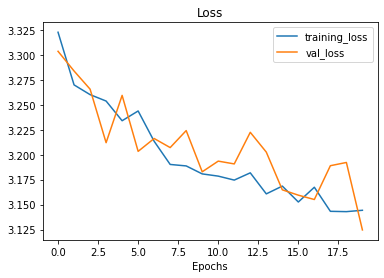

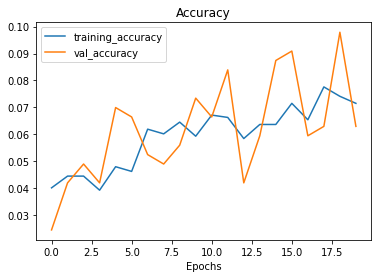

In [ ]:
# plotlossscurve
plot_loss_curves(history_6)



** Mô hình InceptionV3 hoạt động tốt khi so sánh với ResNet50 và EfficientNetB5 **

## Fine-tuning

In [ ]:
# Checking the layer of best forming model(inception)
for layer_number, layer in enumerate(base_model_inception.layers):
    print(layer_number, layer, layer.trainable)

0 <keras.engine.input_layer.InputLayer object at 0x7fc49a0eb7c0> False
1 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc49a34df10> False
2 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fc49a0bc220> False
3 <keras.layers.core.activation.Activation object at 0x7fc49a2ae310> False
4 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc49a0c27f0> False
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fc49a0c26d0> False
6 <keras.layers.core.activation.Activation object at 0x7fc49a0c2880> False
7 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc49a068e50> False
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fc49a2b4310> False
9 <keras.layers.core.activation.Activation object at 0x7fc49a068460> False
10 <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fc49a2f27f0> False
11 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc49a08b850> False
12 <keras.la

In [ ]:
base_model_inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_10 (Conv2D)             (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d_10[0][0]']              
 alization)                     32)                                                    

## kiến trúc inceptionV3 

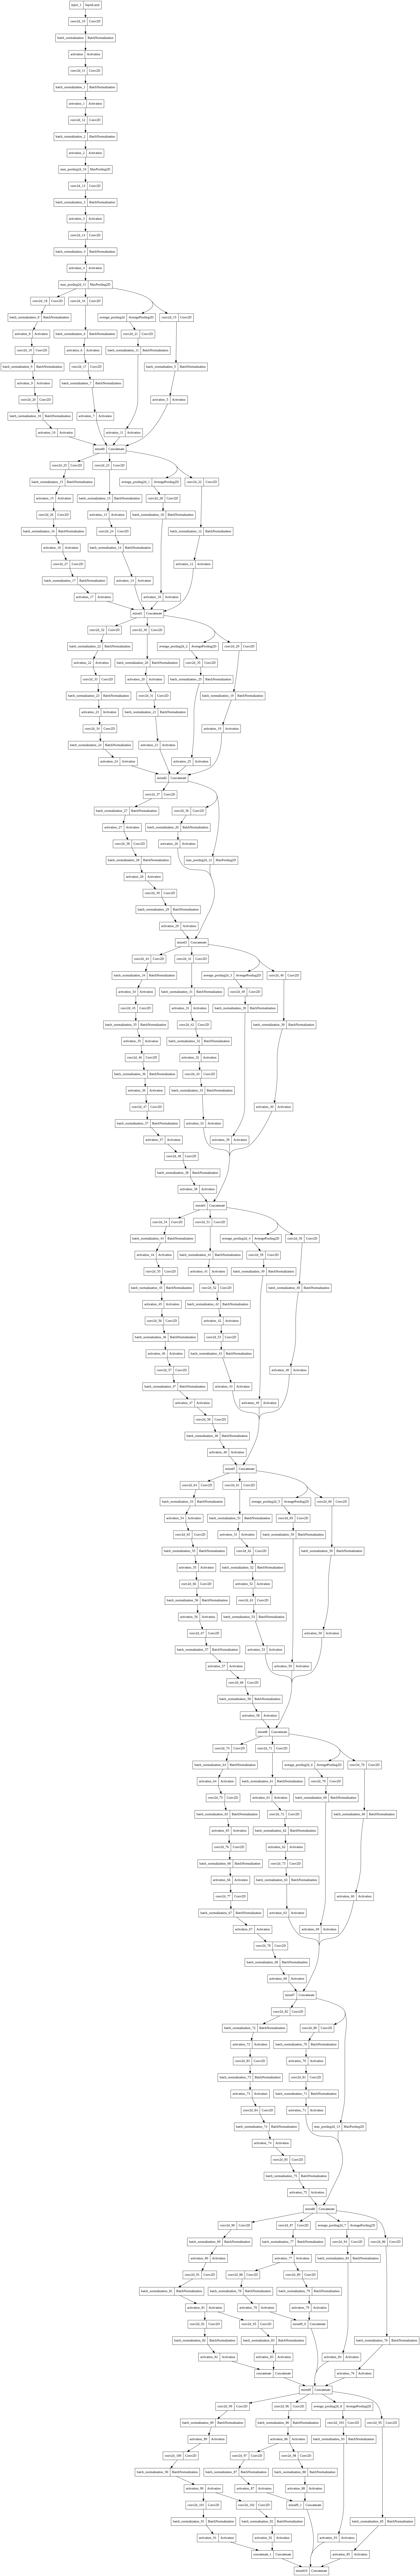

In [ ]:
##  kiến ​​​​trúc inceptionv3
from tensorflow.keras.utils import plot_model
plot_model(base_model_inception)

In [ ]:
base_model_inception.trainable = True

# đóng băng tất cả các lớp ngoại trừ 15 lớp cuối cùng
for layer in base_model_inception.layers[:-15]:
    layer.trainable = False

# Biên dịch lại mô hình
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
# Check the layers
for layer_number,layer in enumerate(base_model_inception.layers):
    print(layer_number, layer, layer.trainable)

0 <keras.engine.input_layer.InputLayer object at 0x7fc49a0eb7c0> False
1 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc49a34df10> False
2 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fc49a0bc220> False
3 <keras.layers.core.activation.Activation object at 0x7fc49a2ae310> False
4 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc49a0c27f0> False
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fc49a0c26d0> False
6 <keras.layers.core.activation.Activation object at 0x7fc49a0c2880> False
7 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc49a068e50> False
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fc49a2b4310> False
9 <keras.layers.core.activation.Activation object at 0x7fc49a068460> False
10 <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fc49a2f27f0> False
11 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc49a08b850> False
12 <keras.la

In [ ]:
# refit the model
history_model_4_fine_tune = model_4.fit(train_data,
                                       epochs=10,
                                       validation_data=valid_data,
                                       initial_epoch=history_4.epoch[-1])

Epoch 10/10
36/36 [==============================] - 19s 179ms/step - loss: 0.4589 - accuracy: 0.8771 - val_loss: 1.2418 - val_accuracy: 0.6084


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-12-04 07:14:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-12-04 07:14:46 (113 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import compare_historys

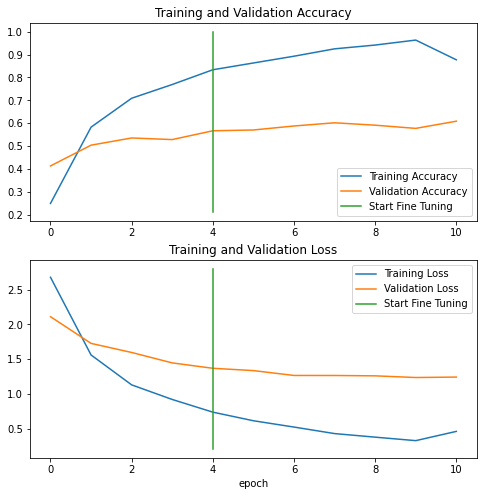

In [ ]:
compare_historys(history_4,
                history_model_4_fine_tune)

In [ ]:
# save the best performing model
model_4.save("output/best_performing_model")
# model_4.save("output/mode.h5")

In [ ]:
model_4.save("model/model.h5")

In [ ]:
# load model
loaded_model = tf.keras.models.load_model("output/best_performing_model")
loaded_model
#flask api 

In [ ]:
# Evaluate
loaded_model.evaluate(valid_data)

9/9 [==============================] - 4s 75ms/step - loss: 1.2418 - accuracy: 0.6084


[1.2417527437210083, 0.6083915829658508]

In [ ]:
# make prediction
pred_probs = loaded_model.predict(valid_data)
pred_probs[:10]

9/9 [==============================] - 4s 74ms/step


array([[1.00070862e-02, 2.85159727e-03, 7.67873018e-04, 1.47758527e-02,
        6.87853340e-03, 2.67441967e-04, 5.88817196e-03, 1.16505391e-04,
        2.87878397e-03, 1.18278817e-03, 6.82569298e-05, 5.58699489e-01,
        6.20978768e-04, 3.74400988e-03, 1.18363500e-02, 3.58376885e-04,
        7.49442503e-02, 2.27956625e-04, 9.23386216e-02, 2.67925316e-05,
        2.63781083e-04, 1.02690896e-02, 6.81859925e-02, 5.99761785e-04,
        1.32201657e-01],
       [1.92364478e-05, 8.92426819e-03, 3.02614615e-04, 3.03394976e-04,
        9.54234929e-06, 1.21845054e-02, 9.14255902e-02, 2.60087108e-04,
        1.53890193e-01, 1.01043303e-02, 2.22132192e-04, 1.76008162e-03,
        2.13974257e-04, 3.16608883e-02, 3.61031503e-03, 3.09891533e-03,
        6.51869969e-03, 2.30859267e-03, 7.16895913e-04, 8.61433875e-07,
        1.27367186e-03, 6.36579394e-01, 1.11054513e-03, 2.02197162e-03,
        3.14792842e-02],
       [7.14500202e-04, 5.97519509e-04, 9.49316993e-02, 5.95347537e-03,
        3.9296

In [ ]:
# pred classes
pred_class = pred_probs.argmax(axis=1)
pred_class[:10]

array([11, 21, 16,  9,  3,  2, 20,  7,  8, 11])

In [ ]:
# Unbatch the images and labels
y_labels = []
for images, labels in valid_data.unbatch():
    y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 40 kB 6.3 MB/s 
     |████████████████████████████████| 588.3 MB 22 kB/s 
     |████████████████████████████████| 189 kB 52.8 MB/s 
     |████████████████████████████████| 16.2 MB 62.1 MB/s 
     |████████████████████████████████| 154 kB 80.0 MB/s 
     |████████████████████████████████| 237 kB 64.9 MB/s 
     |████████████████████████████████| 8.3 MB 62.7 MB/s 
     |████████████████████████████████| 51 kB 8.6 MB/s 
     |████████████████████████████████| 1.7 MB 55.6 MB/s 
     |████████████████████████████████| 6.0 MB 65.5 MB/s 
     |████████████████████████████████| 439 kB 79.8 MB/s 
     |████████████████████████████████| 85 kB 4.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
    

In [ ]:
!pip install ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 38.7 MB/s 


In [ ]:
!pip install PyInquirer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 248 kB 37.8 MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-py3-none-any.whl size=32864 sha256=1b92aba7fdbd45f1c1168e2b5aa6be13ab089a185df625206f6add51f246cb06
  Stored in directory: /root/.cache/pip/wheels/bd/f3/88/f02d7b8ae8d125c2ab25d91e2c65fea21a17fb9324371f906a
Successfully built PyInquirer
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 2.0.10
    Uninstalling prompt-toolkit-2.0.10:
      Successfully uninstalled prompt-toolkit-2.0.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 6.1.0 requires prompt-toolkit!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0, but you have prompt-toolkit 1.0.14 which is incompatible.
ipython 7.9.0 requires prompt-toolkit<2.1.0,>=2.0.0

In [ ]:
# !tensorflowjs
# đổi từ file h5 sang json
! tensorflowjs_converter --input_format=keras /content/model/model.h5 /content/model/tfjs_model

2022-12-04 07:17:30.675130: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-04 07:17:30.675291: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-04 07:17:30.675312: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [ ]:
from google.colab import files
import pandas as pd
files.download('/content/model/tfjs_model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>